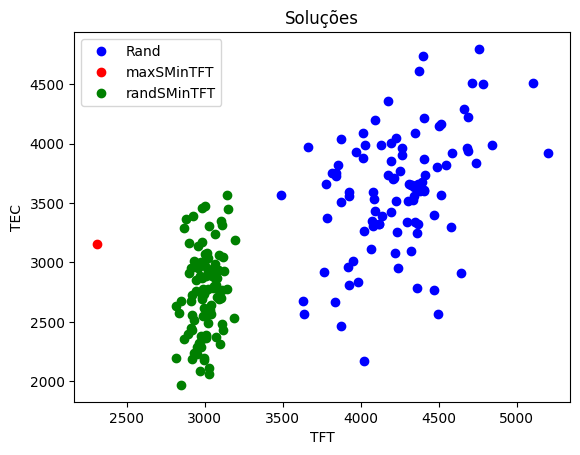

In [26]:
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


def get_points_from_file(path):
    x_array = []
    y_array = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar='\'')
        next(reader, None)
        for row in reader:
            #print(row)
            x_array.append(float(row[1]))
            y_array.append(float(row[2]))

    return x_array, y_array


x_array_tft_rand, y_array_tec_rand = get_points_from_file('pop_output.csv')
x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft = get_points_from_file('max_s_min_tft.csv')
x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft = get_points_from_file('rand_s_min_tft.csv')

fig, ax = plt.subplots(1, 1)
ax.plot(x_array_tft_rand, y_array_tec_rand, 'bo', markersize=6, label="Rand")
ax.plot(x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft, 'ro', markersize=6, label="maxSMinTFT")
ax.plot(x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft, 'go', markersize=6, label="randSMinTFT")
ax.legend()
ax.set_title('Soluções')
ax.set_xlabel('TFT')
ax.set_ylabel('TEC')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['0', '3843.553711', '3726.210205', '4']
['1', '3815.813965', '3755.211914', '4']
['9', '3661.315186', '3973.865234', '2']
['11', '3984.692871', '2834.197266', '4']
['23', '3761.043701', '2923.697266', '2']
['27', '3921.061523', '3561.493652', '5']
['28', '3638.208252', '2568.560303', '1']
['41', '4020.392090', '2166.794434', '1']
['45', '3925.554688', '2813.367188', '3']
['46', '4238.362793', '2956.751465', '5']
['48', '4645.126953', '2912.458984', '5']
['51', '3855.423340', '3820.515625', '5']
['56', '3628.176758', '2679.167725', '1']
['59', '3915.033447', '2964.851562', '3']
['65', '4471.998047', '2764.732178', '3']
['66', '3873.835449', '2462.551758', '1']
['67', '3872.350342', '3511.634033', '4']
['71', '3484.956055', '3566.606445', '1']
['76', '4361.885742', '2785.470459', '3']
['78', '4221.201172', '3081.977051', '5']
['80', '4020.765625', '3261.155762', '5']
['86', '3775.052002', '3662.022217', '3']
['90', '3843.270508', '3752.804688', '4']
['91', '3950.728027', '3011.900879', 

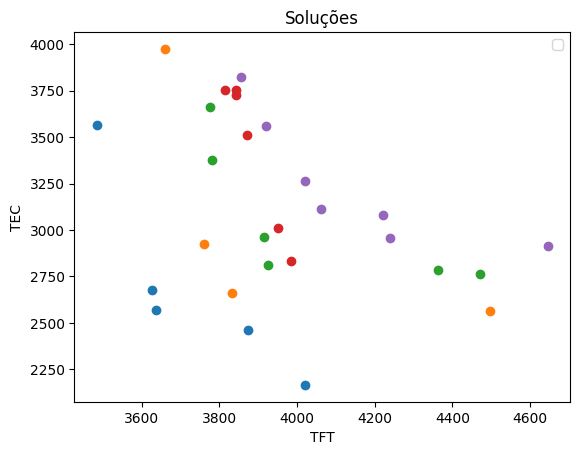

In [27]:

cmap = cm.get_cmap('jet', 5)
gantt_colors = [colors.to_hex(cmap(i)) for i in range(40)]


def get_points_from_file(path):
    population = []
    for i in range(5):
        population.append({'x': [], 'y': []})

    x_array = []
    y_array = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar='\'')
        next(reader, None)

        for row in reader:
            if int(row[3]) <= 5:
                print(row)
                population[int(row[3]) - 1]['x'].append(float(row[1]))
                population[int(row[3]) - 1]['y'].append(float(row[2]))
    return population


population = get_points_from_file('pop_output.csv')
print(population)

#x_array_tft_rand, y_array_tec_rand = get_points_from_file('pop_output.csv')

fig, ax = plt.subplots(1, 1)

for level in population:
    ax.plot(level['x'], level['y'], 'o', markersize=6)
#ax.plot(population[1]['x'], population[1]['y'], 'o',markersize=6, label="front2")
#ax.plot(population[2]['x'], population[2]['y'], 'o',markersize=6, label="front3")

ax.legend()
ax.set_title('Soluções')
ax.set_xlabel('TFT')
ax.set_ylabel('TEC')
plt.show()
